<a href="https://colab.research.google.com/github/Sandeep354/RNN-Google-stock-prediction/blob/main/RNN_Stock_Price_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Recurrent Neural Network

In [18]:
# Part 1 - Data Preprocessing

In [19]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Importing the training set
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values # only want 1st index but still have to specify as 1:2


In [21]:
# Feature Scaling (Standardisation or Normalization)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1)) # this feature_range is by default (0,1) only 
training_set_scaled = sc.fit_transform(training_set)

In [22]:
# Creating a data structure with 60 timesteps and 1 output
# 60 timesteps - look at past 60 data to predict next outcome (1 outcome)
# So we will create X_train (past 60 data) and y_train (1 outcome)
timesteps = 60
X_train = []
y_train = []
for i in range(timesteps, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-timesteps:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [23]:
# Reshaping - adding some more dimension (unit - no. of predictors we can use to predict)
# predictors are --> Indicators 
# we want (batch_size, timesteps, no.of indicators) (we are only adding one indicator here - open price)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [24]:
# Part 2 - Building the RNN

In [25]:
# Importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [26]:
# Initializing the RNN
regressor = Sequential()

In [27]:
# Adding the first LSTM layer and some Dropout regularization (to avoid overfiting)
# 3 inputs in LSTM (no.of memory units/neurons, return sequences-true for multiple LSTM layers/if you want to add more layers, input shape - X_train)
# Now lets add our 1st LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# Add the dropout (we will ignore 20% random neurons)
regressor.add(Dropout(rate = 0.2))

In [28]:
# Adding the 2nd layer LSTM layer and some Dropout regularization (now we dont need to specify input layer anymore)
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

# Adding the 3rd layer LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

# Adding the 4th layer LSTM layer and some Dropout regularization (here, return_sequence=False|this is deafult, so no need to add explicitly|, since we dont any more layers)
regressor.add(LSTM(units = 50))
regressor.add(Dropout(rate = 0.2))

In [29]:
# Adding the output layer (units=1 --> dimension of output layer)
regressor.add(Dense(units = 1))

In [30]:
# Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
# Fitting the RNN to the training set
regressor.fit(x=X_train, y=y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0392
Epoch 2/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0067
Epoch 4/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0059
Epoch 7/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0054
Epoch 10/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0051
Epoch 12/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0043
Epoch 13/100


In [32]:
# Part 3 - Making the predictions and visualising the results

In [33]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [36]:
# Getting the predicted stock price of 2017

# We need to get T to T-59 prices of the stock for predicting the price at time T+1
# So we have to concatenate those with the test set (vertical concat - axis=1)
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)
inputs = dataset_total[len(dataset_train) - len(dataset_test) - 60:].values

# Now get this input to correct format (shape)
inputs = inputs.reshape(-1, 1)

# Scaling (only inputs, not test value)
# Only use transform and not fit_transform (to get same scaling as the previous fitted model)
inputs = sc.transform(inputs)


In [41]:
inputs.shape

(100, 1)

In [39]:
len(dataset_test)

20

In [42]:
# Obtain the right 3-D format for Neural Network
X_test = []
for i in range(timesteps, len(dataset_test) + timesteps):
    X_test.append(inputs[i-timesteps:i, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [43]:
# Prediction of the stock price
predicted_stock_price = regressor.predict(X_test)

# Inverse the scaling of the prediction (to get the original SCALE)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [44]:
predicted_stock_price

array([[771.42035],
       [764.2636 ],
       [762.1098 ],
       [765.6831 ],
       [768.69354],
       [773.1106 ],
       [778.711  ],
       [783.767  ],
       [789.03845],
       [793.2691 ],
       [795.2724 ],
       [796.8272 ],
       [794.7798 ],
       [794.74365],
       [795.93634],
       [796.19073],
       [795.7613 ],
       [795.5148 ],
       [796.59094],
       [794.49225]], dtype=float32)

In [35]:
# Visualizing the results

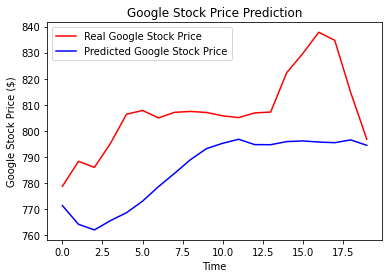

In [45]:
plt.plot(real_stock_price, color='red', label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color='blue', label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price ($)")
plt.legend()
plt.show()